In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## modles
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings

In [165]:
df=pd.read_csv('data/stud.csv')

In [127]:
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score']= df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [166]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [167]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [168]:
pd.DataFrame(X)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [169]:
cat_feature=X.select_dtypes(include='object').columns
numeric_features=X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler=StandardScaler()
onehot=OneHotEncoder()

processing=ColumnTransformer([
            
            ("onhotencoder",onehot,cat_feature),
            ("standardscaler",scaler,numeric_features)

])



In [170]:
X=processing.fit_transform(X)

In [149]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [150]:
X.shape

(1000, 19)

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((800, 19), (200, 19))

In [152]:
def evaluate_models(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r_score=r2_score(true,predicted)

    return mae,mse,r_score

In [ ]:
models={
    'LinearRegression': LinearRegression(),
    'lasso':Lasso(),
    'Ridge':Ridge(),
    'Decision tree regressor':DecisionTreeRegressor(),
    'k neighbours':KNeighborsRegressor(),
    'random forest':RandomForestRegressor(),
    'svr':SVR(),
    'adaboost':AdaBoostRegressor(),
    'xgboost':XGBRegressor(),
    'catboost':CatBoostRegressor()
}
models_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    #trainig model 
    X_train_=model.fit(X_train,y_train)
    #predicting
    y_train_predict=model.predict(X_train)
    y_test_predict=model.predict(X_test)

    #training accuracy models
    X_train_mae,X_train_mse,X_train_r2=evaluate_models(y_train,y_train_predict)
    X_test_mae,X_test_mse,X_test_r2=evaluate_models(y_test,y_test_predict)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(X_train_mae))
    print("- Mean Absolute Error: {:.4f}".format(X_test_mse))
    print("- R2 Score: {:.4f}".format(X_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(X_test_mae))
    print("- Mean Absolute Error: {:.4f}".format(X_test_mae))
    print("- R2 Score: {:.4f}".format(X_test_r2))
    r2_list.append(X_test_r2)
    
    print('='*35)
    print('\n')



In [173]:
pd.DataFrame(list(zip(models_list,r2_list)),columns=['Model name','R score']).sort_values(by=('R score'),ascending=False)

,Model name,R score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,random forest,0.851956
9,catboost,0.851632
7,adaboost,0.848804
8,xgboost,0.827797
1,lasso,0.825320
4,k neighbours,0.783813
3,Decision tree regressor,0.763519
6,svr,0.728600


In [181]:
regression=LinearRegression()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
score=r2_score(y_test,y_pred)
print( " linear model score :",score)

 linear model score : 0.8804332983749565


Text(0, 0.5, 'predicted labl')

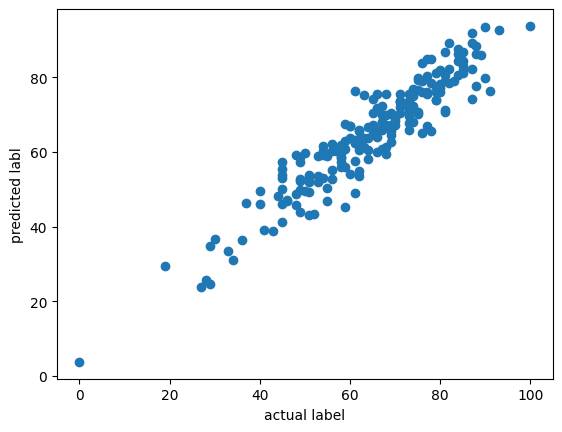

In [184]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual label')
plt.ylabel('predicted labl')


<Axes: xlabel='math_score'>

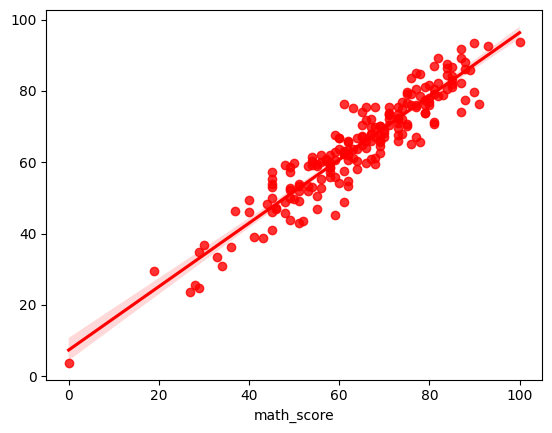

In [185]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,color='red')